## Import statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab as pl

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error,  mean_absolute_percentage_error, r2_score, mean_absolute_error, ConfusionMatrixDisplay, accuracy_score, explained_variance_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,  SVR
from sklearn import tree, linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import seaborn as sns



%matplotlib inline
plt.style.use('seaborn-v0_8-white')

## Clone repository

In [ ]:
!git clone https://git.wur.nl/dijk097/ml2023_projectmbf.git data

fatal: destination path 'data' already exists and is not an empty directory.


## Reading our data

In [ ]:
data = pd.read_csv('data/data_labeled_fixed.csv')
data.columns = data.columns.str.replace("-", "")
print(data.head())
print(data.shape)

   Acin1  Actb  Agap1  Ahi1  Akap11  Akap9  Aldoa  Aldoc  Ankrd12  Anp32a  \
0      3     0      0     1       2      0      1      0        3       2   
1      0     1      0     0       0      0      3      0        0       4   
2      0     0      0     0       0      0      2      1        0       0   
3      0     1      0     4       0      0      1      0        0       1   
4      0     1      0     1       0      0      7      1        2       4   

   ...  mtCo1  mtCytb  mtNd1  mtNd2  mtNd4  mtNd5  mtRnr1  mtRnr2  CELLTYPE  \
0  ...      0      12      3      5      5      4       2      25       BC6   
1  ...      1       5      1      0      2      1       0      16      BC3B   
2  ...      0      12      5      3     10      4       1      14       BC6   
3  ...      0       8      1      3      3      1       0       7      BC3A   
4  ...      0      17      7      3      0      4       0       3       BC7   

              CLASS  
0   Cone Bipolar ON  
1  Cone Bipolar OF

In [ ]:
data.describe()

,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,Zfr,Zranb2,mtCo1,mtCytb,mtNd1,mtNd2,mtNd4,mtNd5,mtRnr1,mtRnr2
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,...,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,0.650913,0.919173,0.405478,0.520945,0.378357,0.352309,1.391515,0.412191,0.925081,2.090494,...,0.554780,0.420247,0.680183,5.238185,4.232277,1.426692,1.953545,2.154672,0.845596,17.400913
std,0.988272,1.101689,0.704867,0.886731,0.745998,0.784241,1.386320,0.746428,1.283807,1.881423,...,0.887709,0.742283,0.977877,3.427689,3.092542,1.474193,1.764161,2.034942,1.241486,18.898079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,6.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,2.000000,2.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,2.000000,3.000000,3.000000,1.000000,19.250000
max,8.000000,8.000000,5.000000,8.000000,11.000000,6.000000,11.000000,8.000000,9.000000,13.000000,...,7.000000,5.000000,8.000000,24.000000,29.000000,13.000000,12.000000,16.000000,13.000000,103.000000


Dropping class column still
As we're still in the first 2 weeks

In [ ]:
data = data.drop(data.columns[-2],axis=1)

In [ ]:
y_cal = data["Calm1"]
x_cal = data.drop(["CLASS", "Calm1"], axis=1)

## Defining functions
We define a couple functions here for our analysis. Most of these have been provided to us through the Lab excercises.

In [ ]:
def diagnostics_plots(lm):
  """
  Plots the four diagnostic plots for lm() output.
  1) Residuals vs Fitted
  2) Normal Q-Q
  3) Scale-Location
  4) Residuals vs Leverage
  """

  fitted_values = lm.fittedvalues
  residuals = lm.resid
  s_residuals = lm.resid_pearson
  #s_residuals = lm.get_influence().resid_studentized_external

  fig, axes = plt.subplots(2, 2, figsize=(10, 10))

  # Plot 1: Residuals vs fitted
  sns.regplot(x=fitted_values, y=residuals, ax=axes[0, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[0, 0].set_xlabel("Fitted Values", fontsize=15)
  axes[0, 0].set_ylabel("Residuals", fontsize=15)
  axes[0, 0].set_title('Residuals vs fitted', fontsize=15)
  axes[0, 0].grid()

  # Plot 2: Standardized residuals
  sm.qqplot(residuals, ax=axes[0, 1],fit=True, line="45", color=sns.color_palette()[0], marker='.')
  axes[0, 1].set_xlabel("Theoretical Quantiles", fontsize=15)
  axes[0, 1].set_ylabel("Studentized residuals", fontsize=15)
  axes[0, 1].set_title('Normal Q-Q', fontsize=15)
  axes[0, 1].grid()

  # Plot 3: Scale-Location
#  sns.regplot(x=fitted_values, y = np.sqrt(s_residuals), ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  sns.regplot(x=fitted_values, y = s_residuals, ax=axes[1, 0], marker='.', lowess=True, line_kws={"color": "red"})
  axes[1, 0].set_xlabel('Fitted values', fontsize=15)
#  axes[1, 0].set_ylabel('sqrt( Studentized residuals )', fontsize=15)
  axes[1, 0].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 0].set_title('Scale-Location', fontsize=15)
  axes[1, 0].grid()

  # Plot 4: Influence Plot
  sm.graphics.influence_plot(lm, ax=axes[1,1], criterionstr='Cooks', size = 1)
  axes[1, 1].set_xlabel('h leverage', fontsize=15)
  axes[1, 1].set_ylabel('Studentized residuals', fontsize=15)
  axes[1, 1].set_title('Residuals vs leverage', fontsize=15)
  axes[1,1].grid()

  plt.tight_layout()
  plt.show()


def plot_regression_preds(test_y, pred_y, title):
    correlation = np.corrcoef(test_y.values.ravel(), pred_y)[0, 1]
    sns.scatterplot(x=test_y, y=pred_y)
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], '--', color='gray')
    good_red = sns.set_hls_values('#8B0000', l=0.3)
    plt.plot(test_y, np.poly1d(np.polyfit(test_y.values.ravel(), pred_y, 1))(test_y), color=good_red)
    plt.xlabel("Truth value")
    plt.ylabel("Predicted value")
    plt.title(title + "\nCorrelation: {:.2f}".format(correlation))
    plt.legend(["Data Points", "Ideal", "Actual"], loc='best')
    plt.show()

# Linear models

Some things we can try for improving our regession models (or model of choice)
- Colinearity among the predictors
- Narrowing our selection of predictors even more
- Pruning in case we go for the Random Forest
- Check for heteroscedasticity, although looking at our QQ again I don't think that's a problem.

In [ ]:
print(x_rod.shape)

(500, 30)


## Multi linear regression model
This model is a simple MLM
Nothing exrta has been done to this model yet in terms of formulation.

The model formula is just "Gene of interest ~ All other highly expressed genes"

Just on a surface level look through summary(), the model looks fine. A healthy mix of p-values among the predictors (not all 1 or 0), same goes for the coefficients.
A correlation of 0.63 in the prediction is really not great though. It's a correlation, not good not bad (imo).

                            OLS Regression Results                            
Dep. Variable:                  Calm1   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     20.69
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:20:42   Log-Likelihood:                -7513.4
No. Observations:                2606   AIC:                         1.593e+04
Df Residuals:                    2154   BIC:                         1.858e+04
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0564      0.438      2.414

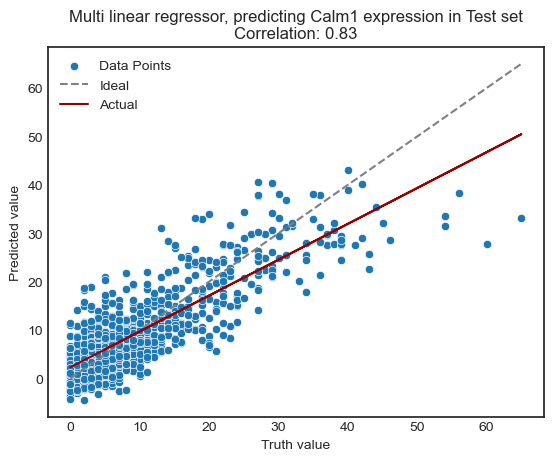

In [ ]:
# Split our data into train and test, with 0.3 split
x_train, x_test, y_train, y_test = train_test_split(x_cal, y_cal, test_size=0.3, random_state=1)

# Initialize and fit model on training data
mlm_fit_rod = smf.ols(formula="Calm1 ~ " + " + ".join(x_cal.columns), data=pd.concat((x_train, y_train), axis=1)).fit()

# Print model summary
print(mlm_fit_rod.summary())

# Predict on test data
y_pred = mlm_fit_rod.predict(x_test)

plot_regression_preds(y_test.squeeze(), y_pred, "Multi linear regressor, predicting Calm1 expression in Test set")

### Diagnostics plots
Plotting our 4 diagnostics plots indicates the model could be suffering from some issues, namely heteroscedasticity though it's hard to tell.
There seems to be a sort of circular or oval shape in the plot, which would not be good.
A Breusch-Pagan and Goldfeld-Quandt test will be performed to give a more clear indication of heteroscedasticity.

The QQ plot aligns well for the most part, but not at the head and tail of the datapoints.

C:\Users\GotYa\anaconda3\envs\WUR_ML\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


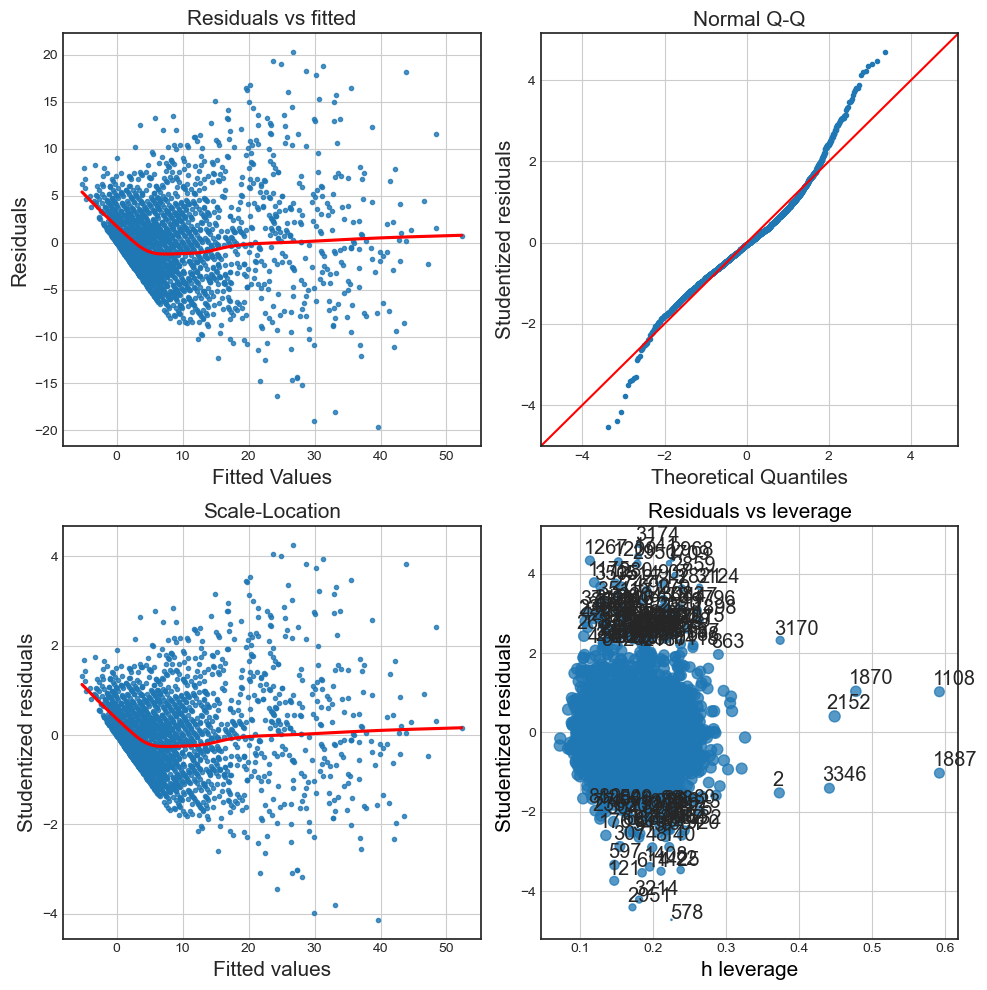

In [ ]:
diagnostics_plots(mlm_fit_rod)

### Testing for heteroscedasticity
Here we perform the Breusch-Pagan and Goldfeld-Quandt tests

If these tests return a p-value lower than 0.05 (standard alpha), it is reasonable to reject the null-hypothesis of no homoscedasticity, and thus heteroscedasticity.

With the returned p-values being pretty far above 0.05, we cannot reject the null hypothesis, indicating homoscedasticity.

In [ ]:
residuals = mlm_fit_rod.resid

design_matrix = mlm_fit_rod.model.exog

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, design_matrix)
print("Breusch-Pagan test p-value:", bp_test[1])

# Goldfeld-Quandt test
gq_test = het_goldfeldquandt(residuals, design_matrix)
print("Goldfeld-Quandt test p-value:", gq_test[1])

Breusch-Pagan test p-value: 2.9120247579433983e-22
Goldfeld-Quandt test p-value: 0.5199750076343574


### Testing for colinearity
With heteroscedasticity not being the problem, we need to look elsewhere.
Next we look for colinearity with VIF
Colinearity also does not seem to be a problem for the model. There is not a single instance of a VIF > 2 which is really good.

In [ ]:
# Add a constant to the predictor variables matrix
x_train_with_const = add_constant(x_train)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()

# Add column names to the DataFrame
vif_data["Variable"] = x_train_with_const.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(x_train_with_const.values, i) for i in range(x_train_with_const.shape[1])]

# Display the DataFrame sorted by VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

    Variable        VIF
0      const  22.060565
267     Pcp2   4.771630
405    Trpm1   2.966277
148     Gsg1   2.830184
138    Gng13   2.821425
..       ...        ...
234    Nedd8   1.213294
101   Dnajc8   1.205785
359     Smc3   1.205285
344    Sf3b1   1.197410
309      Rho   1.196861

[452 rows x 2 columns]


At this point, we could try reducing the amount of predictors
This could be done with Lasso or with forward selection/backward elimination
We could also just do it by hand based on the Importance plots for our tree and forest

# Decision tree regressor
Based on the same selection of data, only "Rod Bipolar" neurons, we also build a decision tree regressor.

We start by splitting our data into a train and test set.
Then we initialize our DTR and fit it on the training data.
After some tweaking of the parameters, a relatively shallow tree seemed to work best.
Finally, we make a prediction on the test data with the fitted model to assess its performance.

With a correlation of 0.4, the performance is noticably worse than the basic mlm.
Though at least the R Squared is positive, meaning the model is better than just random.

MAPE 1665607773042348.0
R^2 0.6102629798456697
MAE 3.9377565527211558
RMSE 5.839725186113656


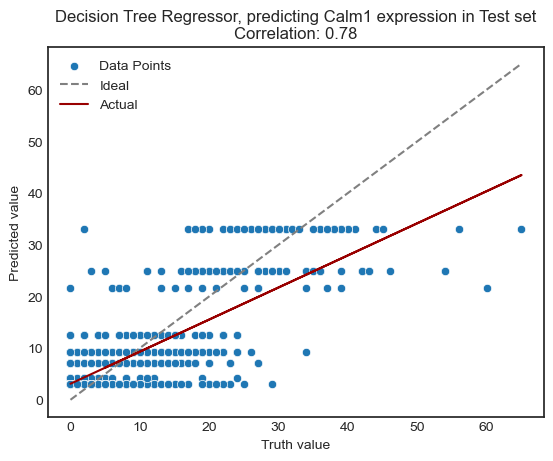

In [ ]:
# Split our data into train and test, with 0.3 split
x_train, x_test, y_train, y_test = train_test_split(x_cal, y_cal, test_size=0.3, random_state=1)

dtr = DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=100)

# Fit the model on the training data
dtr.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = dtr.predict(x_test)

# Calculate performance metrics based on test data
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False))


plot_regression_preds(y_test.squeeze(), y_pred, "Decision Tree Regressor, predicting Calm1 expression in Test set")

### Predictors with importance
Something we'd be interested in seeing is which genes seem to be good predictors for Calm1 expression.
We can visualize this through a bar plot of feature importance.

Through this, we see that the 2 PCP genes, PCP4 and PCP2, seem to be the most important predictors for Calm1.

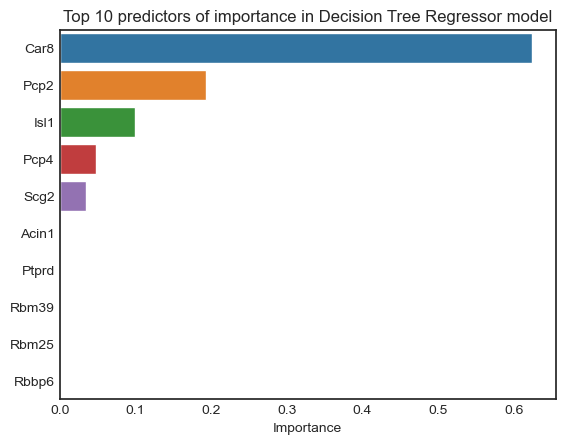

In [ ]:
# Add feature importance to a dataframe, together with the names of the columns.
# Sort for convenience
fi = pd.DataFrame(data=dtr.feature_importances_, index=x_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

# Select top 10 features
top_10_features = fi.head(10)

# Visualize
sns.barplot(data=top_10_features, x="Importance", y=top_10_features.index)
plt.title("Top 10 predictors of importance in Decision Tree Regressor model")
plt.show()

## Random Forest Regressor
As (hopefully) an improvement on our Decision Tree Regressor, we also generate a Random Forest Regressor

We again initialize and fit the model.
Parameters were tweaked similarly to the Decision Tree Regressor, but had little to no effect. Only in so far as reducing performance when making it too shallow depth < 4)

The random forest does perform a lot better than the decision tree, with a much higher correlation and better R Squared.

Out of Bag score: 0.7473594633663359
Mean Squared Error: 25.18912199047079
--Test--
R^2 0.7510393265978119
MSE 21.784315069005945


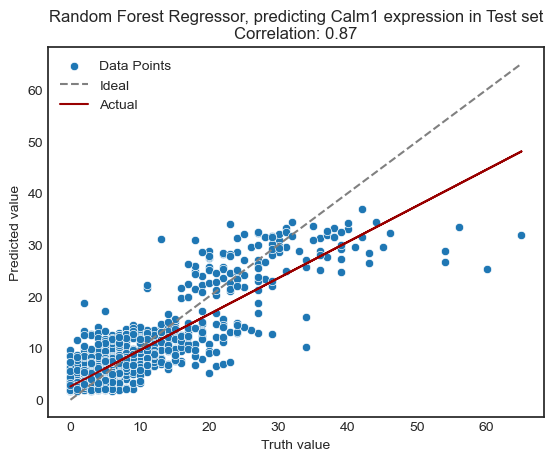

In [ ]:
# Split our data into train and test, with 0.3 split
x_train, x_test, y_train, y_test = train_test_split(x_cal, y_cal, test_size=0.3, random_state=1)

# Create a Random Forest regressor with 50 trees, using at most 90% of the features and calculating the OOB score
rf = RandomForestRegressor(n_estimators=50, max_features=0.9, oob_score=True, max_depth=10, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=100)

# Fit the Random Forest regressor to the training data
rf.fit(x_train, y_train)

# Access the out-of-bag score
oob_score = rf.oob_score_

print("Out of Bag score:", oob_score)
print("Mean Squared Error:", mean_squared_error(y_train, rf.oob_prediction_))

# TODO evaluate with the test set
y_pred = rf.predict(x_test)

# Calculate performance metrics
print("--Test--")
print("R^2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

plot_regression_preds(y_test.squeeze(), y_pred, "Random Forest Regressor, predicting Calm1 expression in Test set")

### Impactful predictors

Again we look at the most important features in our model by bar plot.
And just like with the decision tree, we see the PCP genes as most important again.

In the Random Forest we also see that the PCP genes, proportionally, seem to hold more importance than the remaining genes in the Decision Tree. Especially PCP2 now has a disproportionate amount of importance.

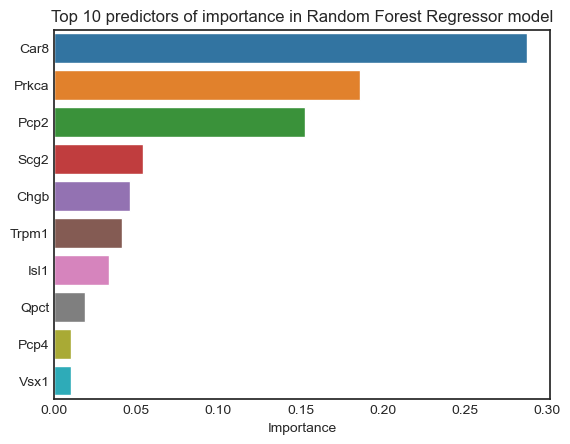

In [ ]:
# Add feature importance to a dataframe, together with the names of the columns.
# Sort for convinience
fi = pd.DataFrame(data=rf.feature_importances_, index=x_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)
# Select top 10 features
top_10_features = fi.head(10)

# Visualize
sns.barplot(data=top_10_features, x="Importance", y=top_10_features.index)
plt.title("Top 10 predictors of importance in Random Forest Regressor model")
plt.show()

To further increase performance, we could still try reducing our features.

# Super Vector Regressor

For the SVR we tried the 4 differnt Kernals, but linear is the only one with decent results.
Lowering the regularization below 1 had no effect, neither did raising it to 100.
This could indicate our model is lacking in complexity, for regularization to make a noticable difference.
Because linear is the only one with decent results, gamma has no effect anymore and the parameter has been removed.

Mean Squared Error: 26.369226006775676
R-squared: 0.6986409605743491
Mean Absolute Error: 3.6438295145961375
Explained Variance Score: 0.6992143139703859


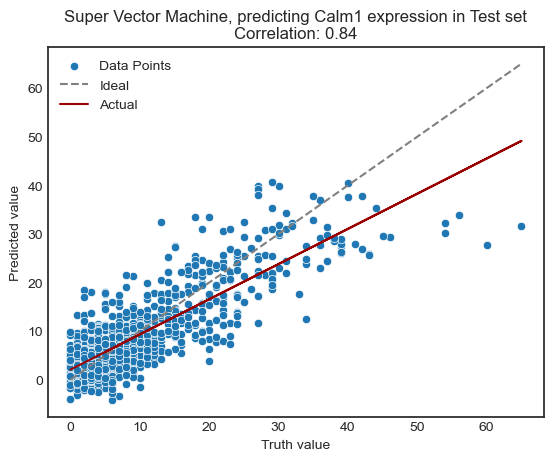

In [ ]:
# Optional scaling
scaler = StandardScaler()
x_cal_scaled = scaler.fit_transform(x_cal)

# Split our data into train and test, with 0.3 split
x_train, x_test, y_train, y_test = train_test_split(x_cal_scaled, y_cal, test_size=0.3, random_state=1)
# "linear" "rbf" "sigmoid" "poly"

svr = SVR(C=10, kernel="linear")
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

# Print the evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))


plot_regression_preds(y_test.squeeze(), y_pred, "Super Vector Machine, predicting Calm1 expression in Test set")

# Feature selection

## Lasso regression

In [ ]:
# Standardize variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_cal)

In [ ]:
lasso = Lasso(max_iter=10000) # setting max_iter prevents ConvergenceWarning

# try 100 lambdas ranging from 10000 down to 0.01
lambdas = 10 ** np.linspace(6,-3,100)

# initialize lists to store coefficients and intercepts
coefs, intercepts = [], []

for l in range(len(lambdas)):
    lasso.set_params(alpha=lambdas[l])
    lasso.fit(x_scaled, y_cal)
    coefs.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

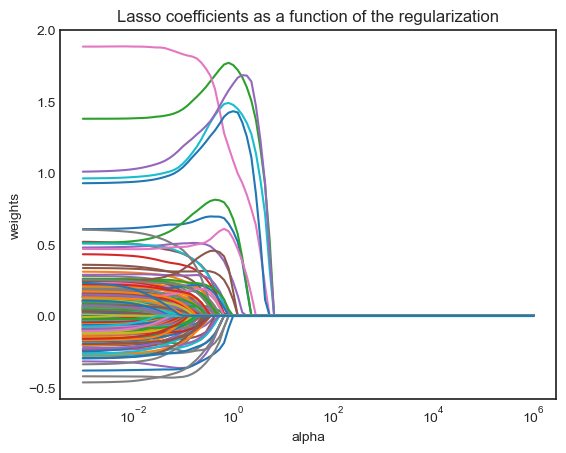

In [ ]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

Minimum CV MSE of 24.727600967434768 at lambda: 0.12328467394420659 (index 76)


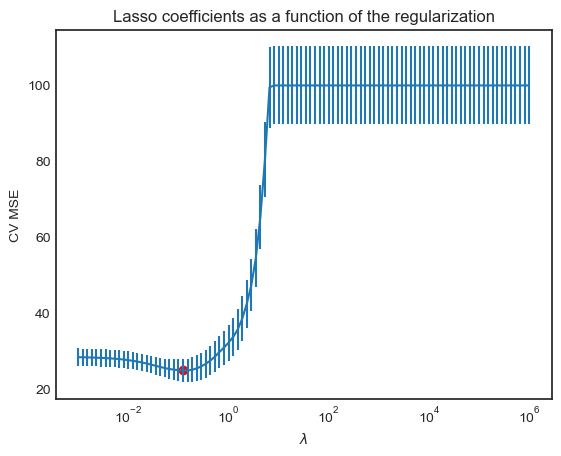

In [ ]:
plt.title('Lasso coefficients as a function of the regularization');
mean_scores = np.zeros(len(lambdas))
std_scores = np.zeros(len(lambdas))

for i, lambda_ in enumerate(lambdas):
    cv = cross_val_score(
        Lasso(lambda_, max_iter=10000),
        x_train, y_train, cv=10, scoring='neg_mean_squared_error'
    )
    mean_scores[i] = cv.mean()
    std_scores[i] = cv.std()

print("Minimum CV MSE of {} at lambda: {} (index {})".format(
    np.min(-mean_scores),
    lambdas[np.argmin(-mean_scores)],
    np.argmin(-mean_scores)
))

plt.errorbar(x=lambdas, y=-mean_scores, yerr=std_scores)
mn, opt = np.min(-mean_scores), np.argmin(-mean_scores)
plt.scatter(lambdas[opt], mn, c='red')
plt.xscale("log")
plt.xlabel('$\lambda$')
plt.ylabel('CV MSE')
plt.show()

In [ ]:
plt.show()
lasso.set_params(alpha=lambdas[np.argmin(-mean_scores)])
lasso.fit(x_train, y_train)
print('MSE on test set:', mean_squared_error(y_test, lasso.predict(x_test)))

MSE on test set: 24.078925042128102


In [ ]:
c = 0
for val, name in zip(lasso.coef_, x_cal.columns):
  if val > 0.2:
    c += 1
    print(val, name)
print(c)

1.3318303187814764 Car8
0.49225178019845667 Cck
0.28257591901976753 Ccng1
1.1490563864805265 Chgb
0.21925343732189895 Cplx3
0.20434361419877747 Fam171b
0.34010620965527627 Gnao1
0.32586137551866573 Ift20
0.6344554755652738 Isl1
0.3097463664141404 Itm2b
0.7327734077238556 Itm2c
0.5328530808247647 Lin7a
0.37612477183521115 Macf1
0.3220425030222795 Ndufa4
0.26273300986342535 Nsf
0.2038204501160285 Ntng1
0.2243939899979054 Pax6
1.7740913674433652 Pcp2
0.3454736417538138 Pcp4
0.3829553067548749 Prkca
1.1230691242477924 Qpct
0.2973582368557558 Scg2
1.3245645989861705 Trpm1
23


## Forward Selection

In [ ]:
reg_model = linear_model.LinearRegression()

forward_sfs = SequentialFeatureSelector(reg_model,
                                        n_features_to_select=8,
                                        direction='forward',
                                        scoring='neg_mean_squared_error',
                                        cv=10).fit(x_cal,y_cal)

print("Forward selection", forward_sfs.get_feature_names_out())

Forward selection ['Car8' 'Chgb' 'Itm2c' 'Pcp2' 'Qpct' 'Scg2' 'Trpm1' 'Ttyh1']


# Classification
From here we move into our other three models, for classification.
Here, things are a bit different in terms of data preparation. For our last three models, we were trying to predict expression of Calm1 based on expression of other genes in Rod Bipolar neurons.
Here, we are performing classification instead. Particularly, on whether a particular neuron is a "Rod Bipolar" type neuron. For this purpose, we split our Class variable into "Rod Bipolar" or "rest"

# Data wrangling
We still select for genes with high expression
And we modify our Class variable
Due to some issues we had with plotting Confusion Matrices, we also generate a list of y variables specifically for plotting confusion matrices.
Thank the lord for random states, because that allows us to just do it once, so long as we keep using the same random state.

In [ ]:
x = data.drop(["CLASS"],axis=1)
x = x[x.columns[x.mean() > 2]]

y = pd.DataFrame(data["CLASS"])

y_rb1 = y.copy()

new_col = []

for val in  y_rb1["CLASS"]:
    if val == "Rod Bipolar":
        new_col.append(val)
    else:
        new_col.append("rest")

y_rb1["CLASS"] = new_col

y_rb2 = pd.get_dummies(y_rb1.CLASS).iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(x, y_rb2, random_state=1)

y_test_conf_m = []
for val in y_test:
    if val:
        y_test_conf_m.append("rest")
    else:
        y_test_conf_m.append("Rod Bipolar")

# KNN model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_rb2, random_state=1)

# Set a random seed to have the same results every run.
np.random.seed(1)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn_model.fit(x_train, y_train)

y_pred = knn_fit.predict(x_test.values)

# Put in a data frame for printing
y_pred_df = x_test.copy()
y_pred_df['y_pred'] = y_pred

# prediction summary
y_pred_propa = knn_fit.predict_proba(x_test)
y_pred = knn_fit.predict(x_test)

# Print both using a data frame
pd.DataFrame({knn_fit.classes_[0]: y_pred_propa[:, 0],
              knn_fit.classes_[1]: y_pred_propa[:, 1],
              'Prediction': y_pred})


# Compare the predicted and true labels
y_pred = knn_fit.predict(x_test)
y_compare = y_pred == y_test

# Print the number of correct and false predictions
print('Correct/False predictions:')
print(y_compare.value_counts())

# Print the accuracy
accuracy = y_compare.mean()
print('\nThe accuracy: ', accuracy)

y_pred = np.asarray(["rest" if x > 0.5 else "Rod Bipolar" for x in y_pred])

conf_m = pd.DataFrame(confusion_matrix(y_true=y_test_conf_m, y_pred=y_pred, labels=np.unique(y_test_conf_m)).T)
conf_m.index.name = 'Predicted'
conf_m.columns.name = 'True'


print(conf_m)

C:\Users\GotYa\anaconda3\envs\WUR_ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Correct/False predictions:
rest
True     922
False      9
Name: count, dtype: int64

The accuracy:  0.9903329752953813
True         0    1
Predicted          
0          115    6
1            3  807


# Tree model for classification
We already have a 0.97 accuracy out of the box
If it ain't broke...

Accuracy: 0.9742212674543501
Precision: 0.985239852398524
Recall: 0.985239852398524
F1-score: 0.985239852398524
ROC AUC Score: 0.9417724685721434


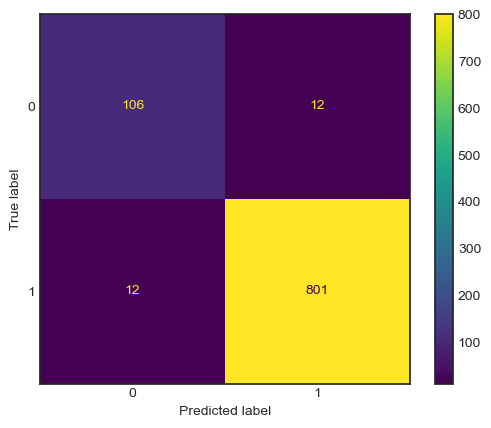

<Figure size 6400x4000 with 0 Axes>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_rb2, random_state=1)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(np.asarray(y_test), y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.figure(figsize=(16,10), dpi=400)
plt.show()

### Tree visualization

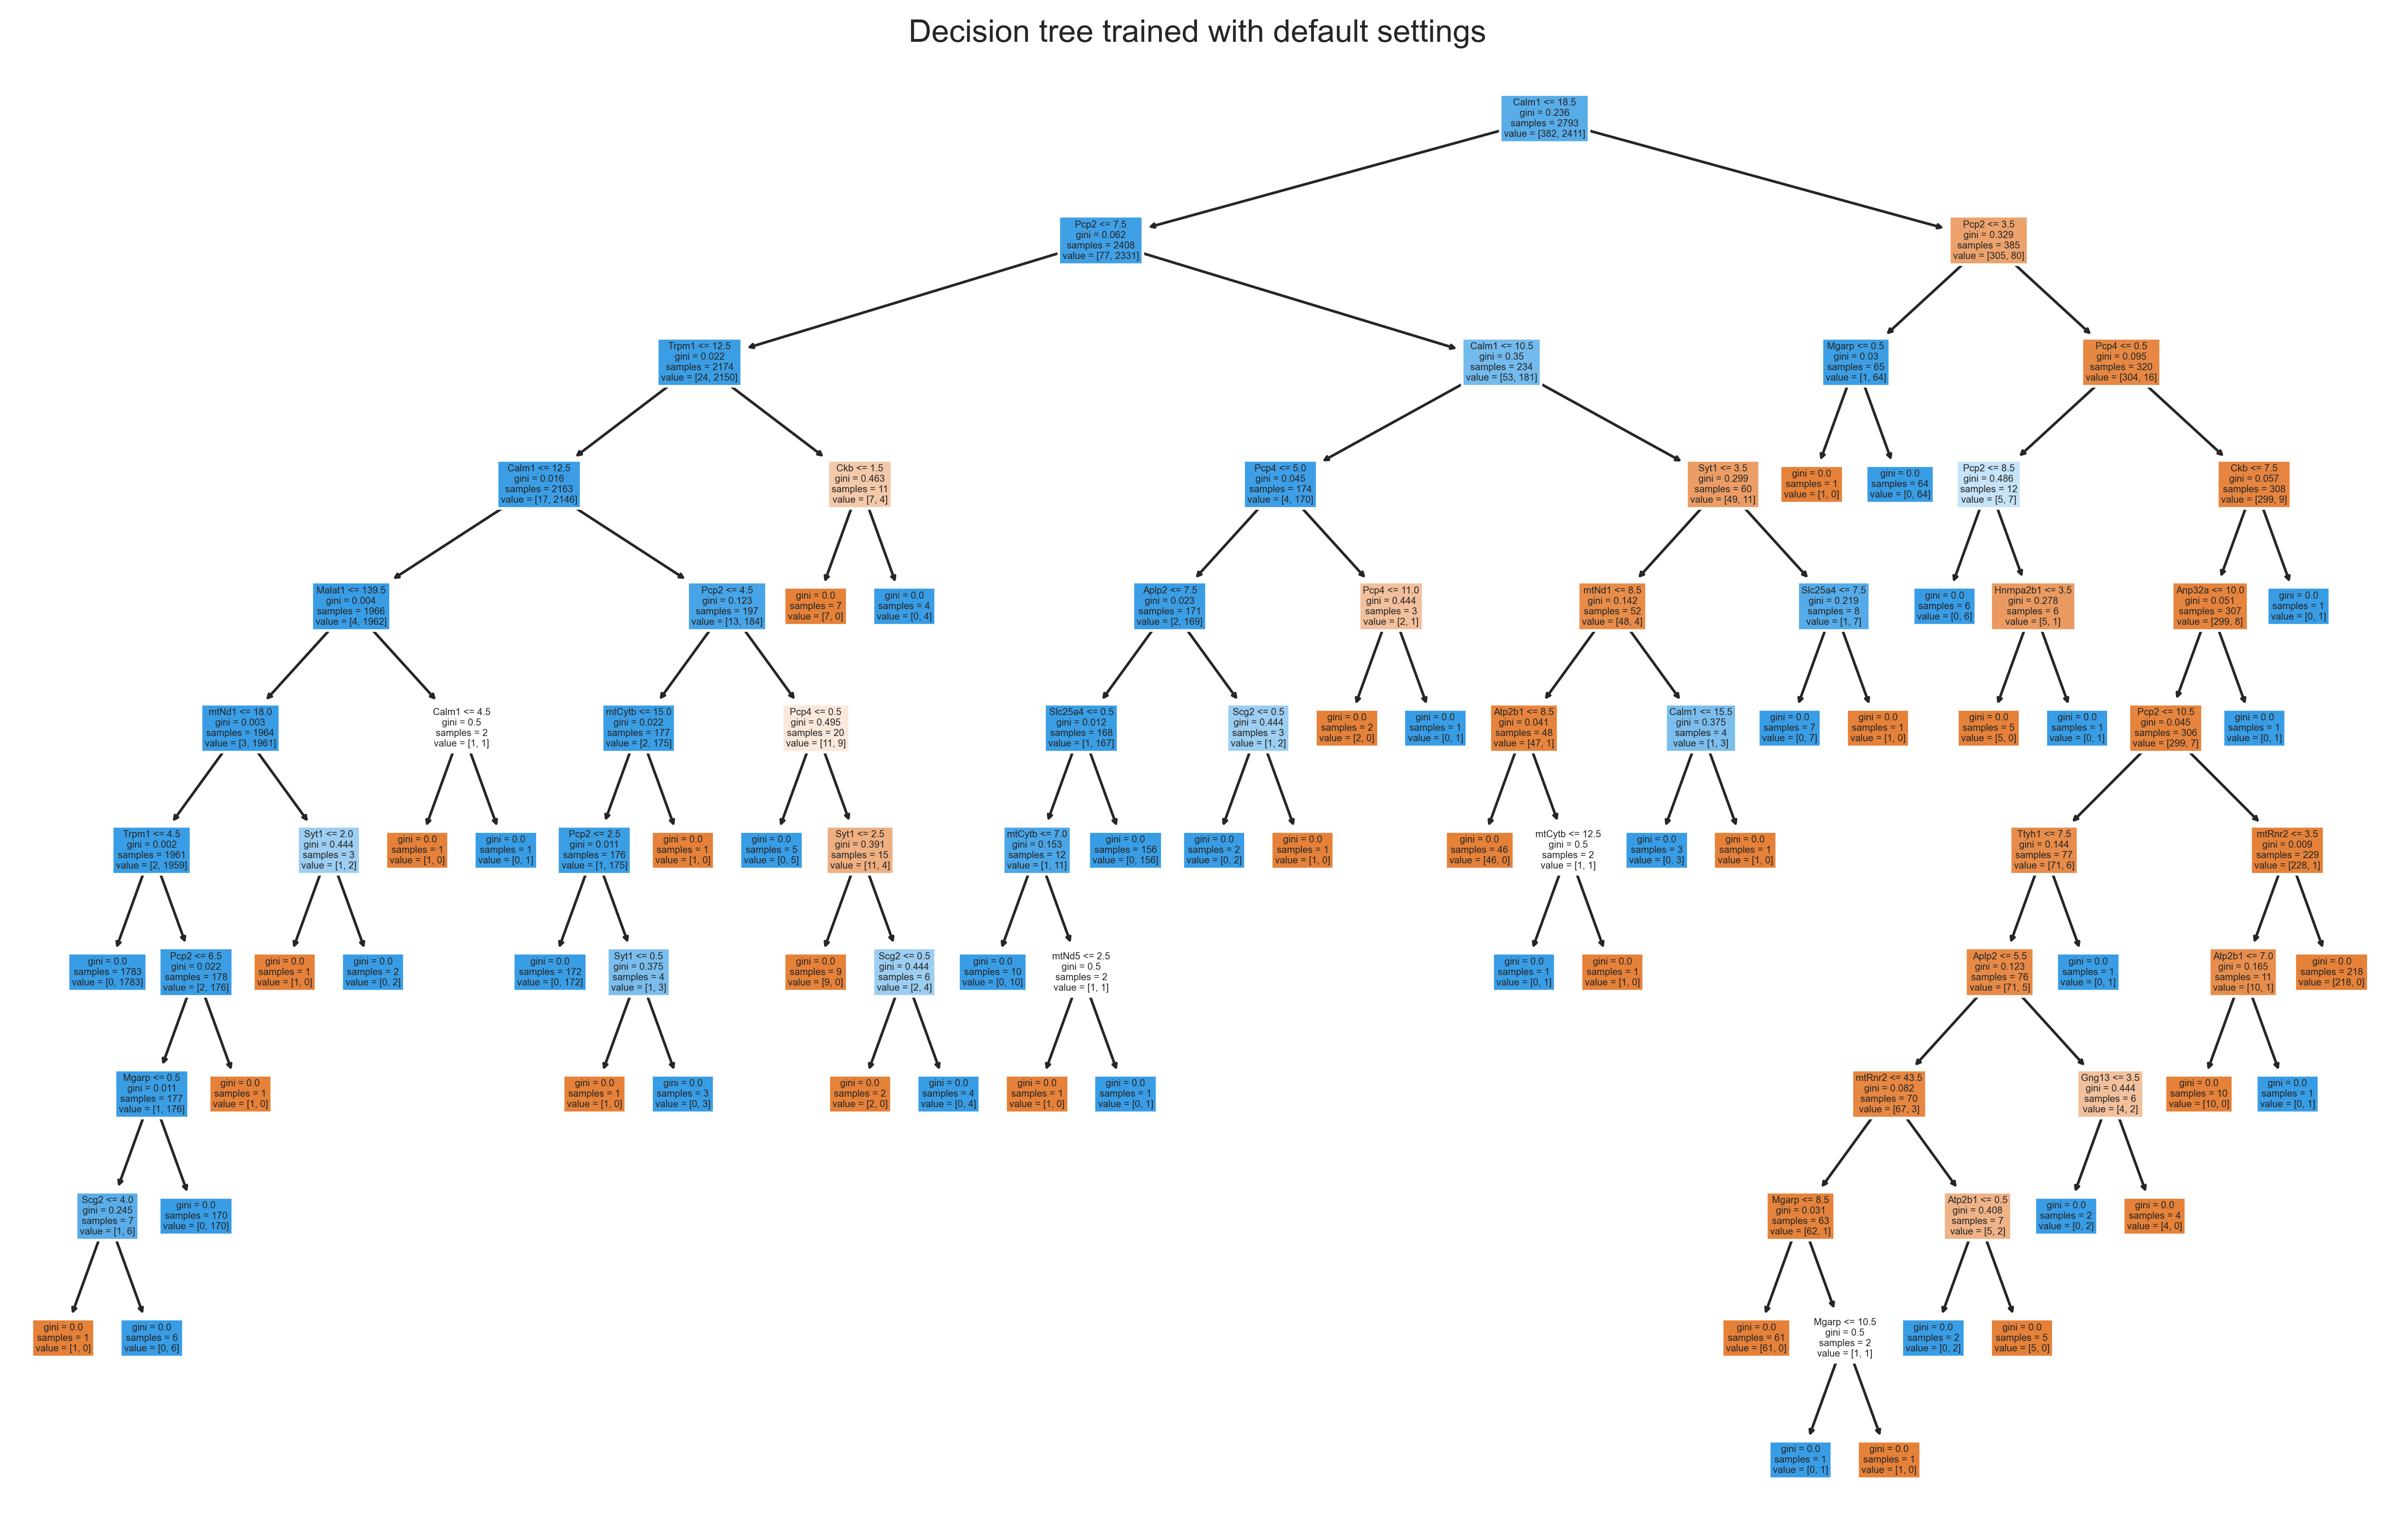

In [ ]:
plt.figure(figsize=(16,10), dpi=400)
tree.plot_tree(clf, filled=True, feature_names=list(x_train.columns))
plt.title("Decision tree trained with default settings")
plt.show()

### Important predictors

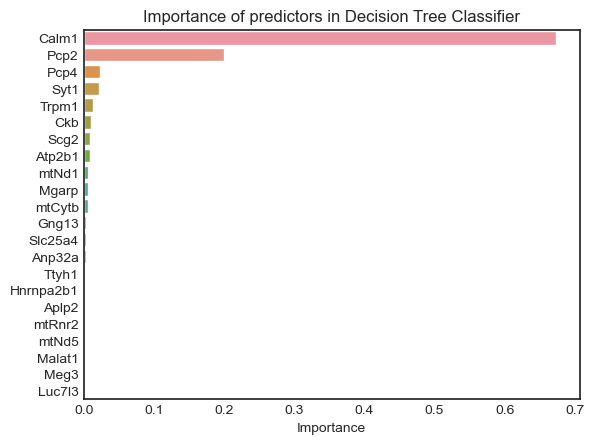

In [ ]:
fi = pd.DataFrame(data=clf.feature_importances_, index=x.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

sns.barplot(data=fi, x="Importance", y=fi.index)
plt.title("Importance of predictors in Decision Tree Classifier")
plt.show()

# Random forest classifier
We again have a very high 0.98 accuracy out of the box
If it ain't broke...

Out Of Bag: 0.9856784819190835
Accuracy: 0.9871106337271751
Precision: 0.9914110429447853
Recall: 0.993849938499385
F1-score: 0.9926289926289927
ROC AUC Score: 0.96726395230054


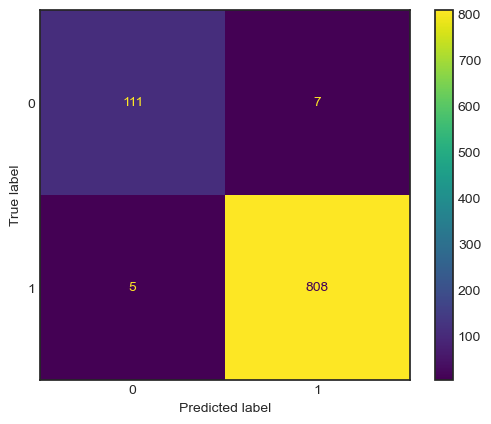

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_rb2, random_state=1)

rf = RandomForestClassifier(n_estimators=50, max_features=0.9, oob_score=True)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("Out Of Bag:", rf.oob_score_)
print("Accuracy:", accuracy_score(np.asarray(y_test), y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### Important predictors

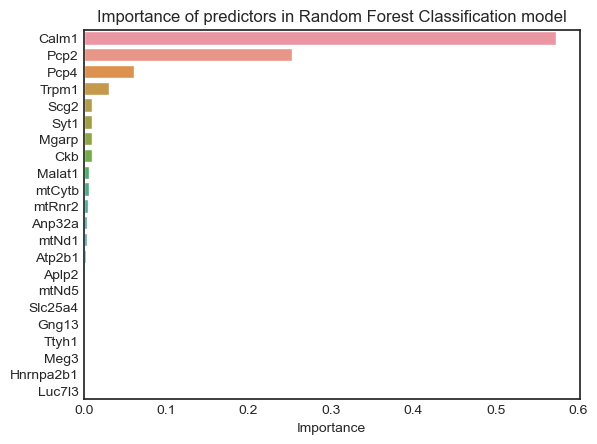

In [ ]:
fi = pd.DataFrame(data=rf.feature_importances_, index=x_train.columns, columns = ['Importance'])\
       .sort_values(by=['Importance'], ascending= False)

sns.barplot(data=fi, x="Importance", y=fi.index)
plt.title("Importance of predictors in Random Forest Classification model")
plt.show()

# Super Vector Classifier
We again have a very high 0.99 accuracy out of the box
If it ain't broke...

Accuracy: 0.9860365198711063
Precision: 0.988997555012225
Recall: 0.995079950799508
F1-score: 0.9920294297976701
ROC AUC Score: 0.9594043821794149


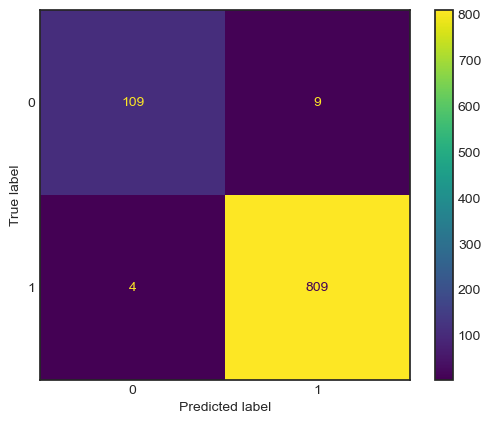

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_rb2, random_state=1)

svc = SVC(C=1, kernel="linear", random_state=42)

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print("Accuracy:", accuracy_score(np.asarray(y_test), y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()